In [1]:
!pip install kaggle
import kaggle
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
orders.csv: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# extract file from zip file
import zipfile
zip_ref = zipfile.ZipFile('archive.zip')
zip_ref.extractall() # extract file to dir
zip_ref.close() #close file

In [3]:
#  read data from file and handle null values
!pip install pandas 
import pandas as pd
df = pd.read_csv('orders.csv')
df.head(20)


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,Not Available,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [4]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

In [5]:
df = pd.read_csv('orders.csv',na_values=['Not Available','unknown'])
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [6]:
#remane columns names .... make them lower case and replace space with underscore
# df.rename(columns={'Order Id':'order_id', 'City':'city'})
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [7]:
#derive new columns discount , sale price and profit

df['discount']=df['list_price']*df['discount_percent']*.01
df['sale_price']= df['list_price']-df['discount']
df['profit']=df['sale_price']-df['cost_price']
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9,29.1,-0.9


In [8]:
#convert order date from object data type to datetime
df['order_date']=pd.to_datetime(df['order_date'],format="%Y-%m-%d")
df.dtypes

order_id                     int64
order_date          datetime64[ns]
ship_mode                   object
segment                     object
country                     object
city                        object
state                       object
postal_code                  int64
region                      object
category                    object
sub_category                object
product_id                  object
cost_price                   int64
list_price                   int64
quantity                     int64
discount_percent             int64
discount                   float64
sale_price                 float64
profit                     float64
dtype: object

In [9]:
#drop cost price list price and discount percent columns
df.drop(columns=['list_price','cost_price','discount_percent'],inplace=True)
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9


In [10]:
!pip install mysql-connector-python
!pip install sqlalchemy 
!pip install pymysql



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from sqlalchemy import create_engine

user = 'root'
password = 'Prasad%40123'  # '@' must be replaced with '%40'
host = 'localhost'
port = 3306
database = 'abhansal'  # replace with the correct database

engine = create_engine(
    f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"
)
conn = engine.connect()

#load the data into sql server 
df.to_sql('df_orders', con=conn, index=False, if_exists='replace') 


9994

1) Drop the table df_order in sql
2) create a table again and then, perform step 3
3) Instead of replace use append in given code 

In [13]:
#load the data into sql server using append option
df.to_sql('df_orders', con=conn, index=False, if_exists='append') 

9994

__EDA__

In [15]:
# Correlation matrix for numeric variables
correlation_matrix = df[['sale_price', 'profit', 'discount', 'quantity']].corr()
print(correlation_matrix)


            sale_price    profit  discount  quantity
sale_price    1.000000  0.891673  0.948910  0.200574
profit        0.891673  1.000000  0.833228  0.162755
discount      0.948910  0.833228  1.000000  0.198502
quantity      0.200574  0.162755  0.198502  1.000000


In [30]:
# See basic statistics of numbers like mean, min, max, etc.

# Check how many times each category appears 
# value_counts() tells us which shipping mode or customer segment is most used.

print("Summary Statistics of Numeric Columns:")
print(df.describe()) # df.describe() tells us the minimum, maximum, average sales or profit.

print("\nUnique values in important columns:")
print("Ship Mode:", df["ship_mode"].unique())
print("Segment:", df["segment"].unique())
print("Region:", df["region"].unique())
print("Category:", df["category"].unique())
print("Sub Category:", df["sub_category"].unique())


Summary Statistics of Numeric Columns:
          order_id                     order_date   postal_code     quantity  \
count  9994.000000                           9994   9994.000000  9994.000000   
mean   4997.500000  2022-12-29 10:20:34.820892672  55190.379428     3.789574   
min       1.000000            2022-01-01 00:00:00   1040.000000     1.000000   
25%    2499.250000            2022-06-29 00:00:00  23223.000000     2.000000   
50%    4997.500000            2022-12-28 00:00:00  56430.500000     3.000000   
75%    7495.750000            2023-07-03 00:00:00  90008.000000     5.000000   
max    9994.000000            2023-12-31 00:00:00  99301.000000    14.000000   
std    2885.163629                            NaN  32063.693350     2.225110   

          discount    sale_price       profit  
count  9994.000000   9994.000000  9994.000000  
mean      8.037953    221.718901    20.529188  
min       0.000000      0.000000    -5.000000  
25%       0.600000     19.200000    -0.400000  


In [21]:
!pip install seaborn 
!pip install matplotlip

import seaborn as sns
import matplotlib.pyplot as plt


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 217.9 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 252.2 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 252.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 328.2 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 456.4 kB/s eta 0:00:01
   ---------------------- --------------


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplotlip (from versions: none)
ERROR: No matching distribution found for matplotlip

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


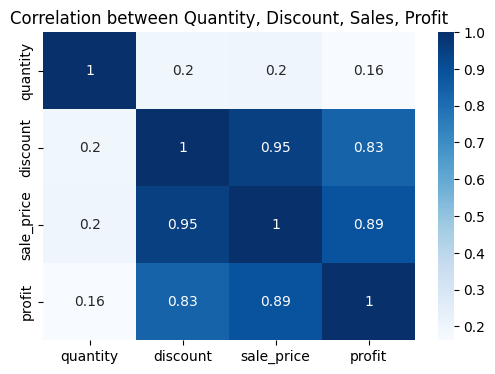

In [32]:
# Correlation Heatmap

# if discount goes up, profit usually goes down.The heatmap shows this using colors and numbers 
#(closer to 1 = strong positive relation, closer to -1 = strong negative relation).”

plt.figure(figsize=(6,4))
sns.heatmap(df[["quantity","discount","sale_price","profit"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation between Quantity, Discount, Sales, Profit")
plt.show()


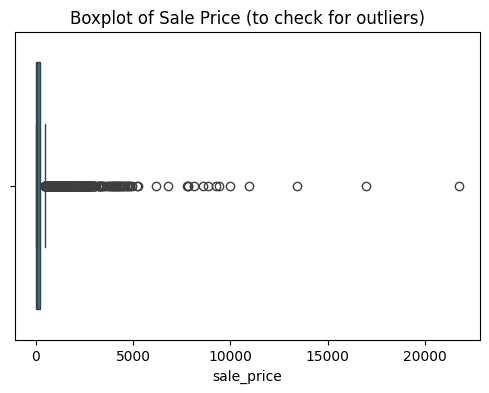

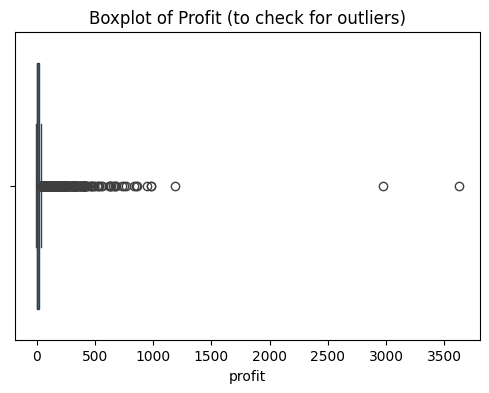

In [35]:

#  Outlier Detection using Boxplots
# help us find outliers — values that are much higher or lower than normal. 
# For example, a very high sale price could mean a premium product. Outliers are shown as dots outside the box.

# Boxplot for Sale Price

plt.figure(figsize=(6,4))
sns.boxplot(x=df["sale_price"])
plt.title("Boxplot of Sale Price (to check for outliers)")
plt.show()

# # Boxplot for Profit

plt.figure(figsize=(6,4))
sns.boxplot(x=df["profit"])
plt.title("Boxplot of Profit (to check for outliers)")
plt.show()


__Visualization__

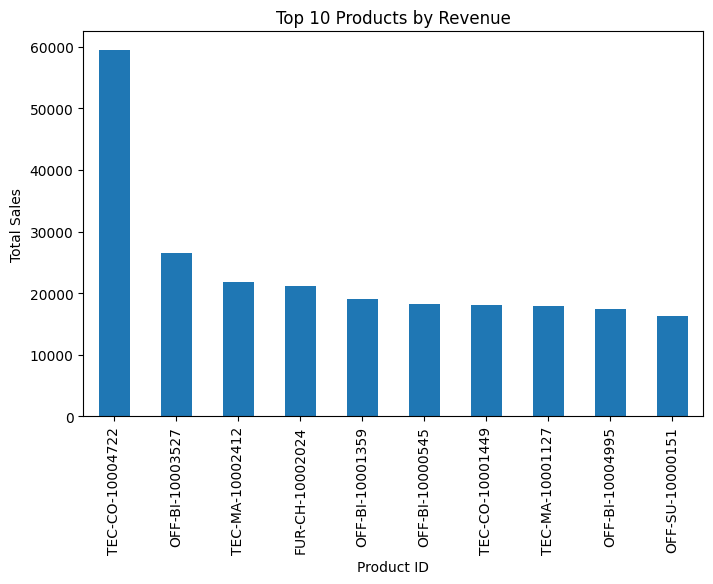

In [44]:
#  Bar Chart: Top 10 products by revenue

# This shows which products generated the highest revenue. Helps identify best-selling products.
top_products = (
    df.groupby("product_id")["sale_price"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind="bar", figsize=(8,5))
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product ID")
plt.ylabel("Total Sales")
plt.show()

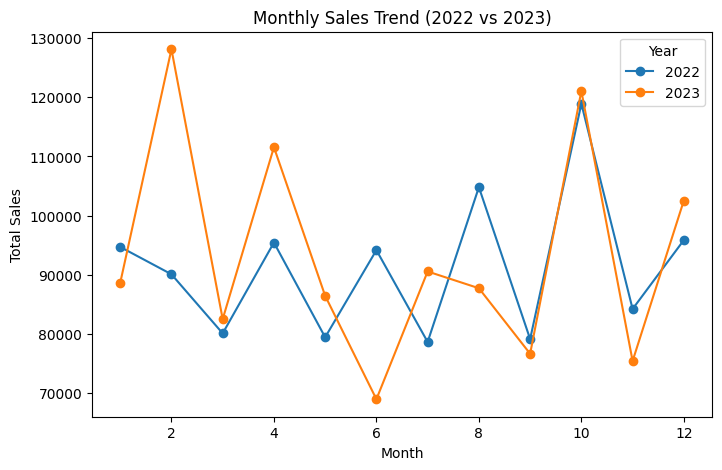

In [43]:
#  Line Chart: Month-over-month sales trend (2022 vs 2023)
df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.month

# This shows sales trend month by month for 2022 and 2023. We can easily compare year-over-year growth
monthly_sales = (
    df.groupby(["year","month"])["sale_price"].sum().unstack(0)
)

monthly_sales.plot(kind="line", marker="o", figsize=(8,5))
plt.title("Monthly Sales Trend (2022 vs 2023)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Year")
plt.show()

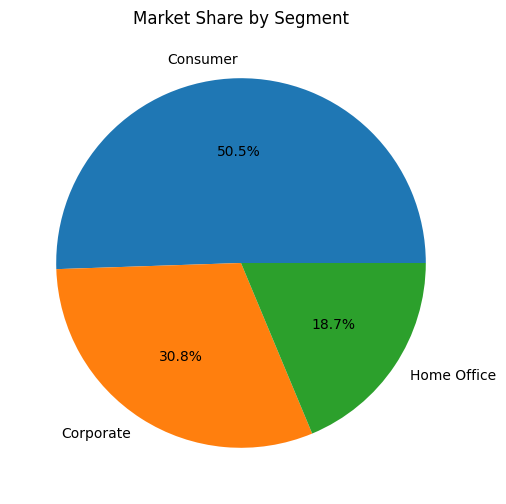

In [42]:
# Pie Chart: Market share by segment
segment_sales = df.groupby("segment")["sale_price"].sum()

# This shows how total sales are divided among different customer segments (like Consumer, Corporate, Home Office).”
segment_sales.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Market Share by Segment")
plt.ylabel("")  # removes extra label
plt.show()